In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.signal import convolve2d

from common import plot_image

In [6]:
def cv2_pad(im, method="clip", padding=0):
    border_type_map = {
        "clip": cv2.BORDER_CONSTANT, 
        "wrap": cv2.BORDER_WRAP, 
        "copy": cv2.BORDER_REPLICATE, 
        "reflect": cv2.BORDER_REFLECT_101,
    }
    return cv2.copyMakeBorder(im.copy(), *([padding] * 4), border_type_map[method])


def gaussian_function_2d_particular(x, sigma=1.0):
    return np.exp(-0.5 * (1 / sigma) * (x * x).sum()) / (2 * sigma * np.pi)


def generate_gaussian_kernel(kernel_size, sigma=1.0):
    side = (kernel_size - 1) / 2
    x, y = np.meshgrid(np.arange(kernel_size) - side, np.arange(kernel_size) - side)
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = gaussian_function_2d_particular(
                np.array([x[i, j], y[i, j]]), sigma=sigma
            )
    return kernel


def convolve(input, kernel):
    padding = kernel.shape[0] - 1
    output = np.zeros((input.shape[0] - padding, input.shape[1] - padding, input.shape[2]))
    for c in range(input.shape[2]):
        output[..., c] = convolve2d(input[..., c], kernel, mode="valid")
    return output

### Read source image

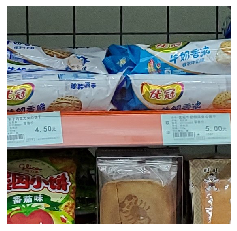

In [7]:
im = np.array(Image.open("image.jpg"))
plot_image(im, plt.gca())

### Show padded image and blurred image under differenct choices of border type

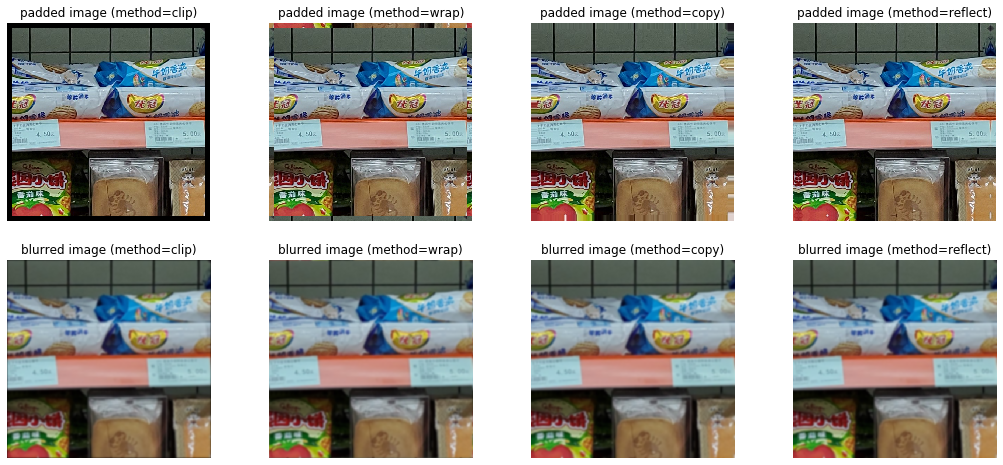

In [8]:
methods = ["clip", "wrap", "copy", "reflect"]
kernel_size = 31
padding = int((kernel_size - 1) / 2)
filter = generate_gaussian_kernel(kernel_size, sigma=7)
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
for i in range(len(methods)):
    im_pad = cv2_pad(im, method=methods[i], padding=padding)
    plot_image(im_pad, ax[0][i], title=f"padded image (method={methods[i]})")
    
    im_blur = convolve(im_pad, filter).astype(np.uint8)
    plot_image(im_blur, ax[1][i], title=f"blurred image (method={methods[i]})")
